In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
    sys.path.append(module_path + "/src/simulations_v2/params/spring_2021_calibration/")
    sys.path.append(module_path + "/notebooks/pnas_paper_figs/")

from multiprocessing import Process


In [2]:
!pip install pyDOE

In [3]:
from uncertainty_analysis import calculate_pessimistic_scenario, \
            load_sim_output, residential_regression, virtual_vs_residential_regression,\
            UNCERTAINTY_PARAMS_LIST

from LHS_sim_code import *

### Processing Prior Sim

In [4]:
pd.set_option('display.max_columns', None)  

In [5]:
prior_output_sim_files = []
for i in range(1000):
    #fname = '/home/jmc678/covid_data/group-testing/notebooks/apr_29_scenarios/point_{}.dill'.format(i)
    if i != 524:
    
        #fname = '/Users/brianliu/GraduateSchool/Fall2021/MiscResearch/COVID/group-testing/notebooks/sept_29_prior_sims/point_{}.dill'.format(i)
        fname = '/home/yz685/group-testing/notebooks/sept_29_prior_sims/point_{}.dill'.format(i)

        prior_output_sim_files.append(fname)


scenario_data = load_sim_output(prior_output_sim_files)
#res_results = residential_regression(scenario_data)


In [6]:
prior_median_outcomes = np.array(scenario_data['res_cornell_inf_50'])

In [7]:
len(prior_median_outcomes)

999

In [8]:
quantiles = np.arange(0,1,0.05)
quantiles[0] = 0.01
quantiles = np.append(quantiles, np.array([0.99]))
quantiles

array([0.01, 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 0.99])

In [9]:
quantile_pess_sim_files = []

for q in 100*quantiles:
    
    if len(str(int(q))) == 1:
        quantile_str = '0' + str(int(q))
    else:
        quantile_str = str(int(q))
    fname = '/home/yz685/group-testing/notebooks/sept_30_linear_pess_sims_20runs/'+quantile_str+'_quantile.dill'
    quantile_pess_sim_files.append(fname)

quantile_pess_scenario_data = load_sim_output(quantile_pess_sim_files)

In [10]:
quantile_pess_median_outcomes = np.array(quantile_pess_scenario_data['res_cornell_inf_50'])

In [11]:
len(quantile_pess_median_outcomes)

21

In [12]:
r = []

for i in range(21):
    r.append(sum(prior_median_outcomes < quantile_pess_median_outcomes[i]) / 999)

In [13]:
r

[0.03903903903903904,
 0.1111111111111111,
 0.12712712712712712,
 0.18118118118118118,
 0.2132132132132132,
 0.35135135135135137,
 0.2932932932932933,
 0.3563563563563564,
 0.36236236236236236,
 0.43743743743743746,
 0.5395395395395396,
 0.5535535535535535,
 0.5285285285285285,
 0.6506506506506506,
 0.7607607607607607,
 0.7497497497497497,
 0.8088088088088088,
 0.8188188188188188,
 0.8898898898898899,
 0.9259259259259259,
 0.98998998998999]

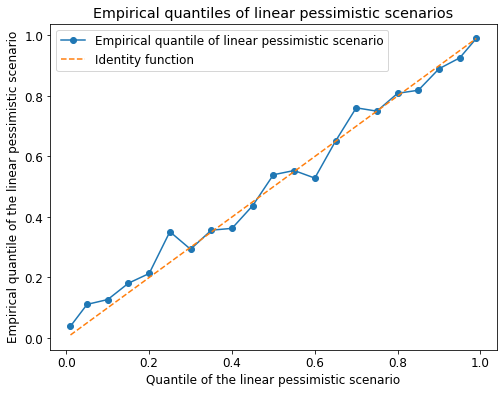

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(quantiles, r, '-o', label = 'Empirical quantile of linear pessimistic scenario')
plt.plot(quantiles, quantiles, '--', label = 'Identity function')
plt.title('Empirical quantiles of linear pessimistic scenarios')
plt.xlabel('Quantile of the linear pessimistic scenario')
plt.ylabel('Empirical quantile of the linear pessimistic scenario')
plt.legend()

plt.savefig('09_30_21_model_free_goodness_of_fit.pdf',format='pdf', dpi=600, bbox_inches='tight')